<a href="https://colab.research.google.com/github/wendianaxu/speech-emotion-recognition/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/wendianaxu/speech-emotion-recognition.git

Cloning into 'speech-emotion-recognition'...
remote: Enumerating objects: 1525, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1525 (delta 22), reused 31 (delta 9), pack-reused 1469
Receiving objects: 100% (1525/1525), 213.92 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (261/261), done.
Updating files: 100% (1445/1445), done.


In [ ]:
# copy directory to drive
!cp -r "/content/speech-emotion-recognition" "/content/drive/MyDrive"

In [ ]:
# test: load an audio file, extract mfccs, and visualize

test_file = "/content/drive/MyDrive/speech-emotion-recognition/RAVDESS_data/Actor_01/03-01-01-01-01-01-01.wav"
n_mfcc = 13 # common choice
sr = 22050 # sampling rate


In [ ]:
# visualize mfccs
audio, sampling_rate = librosa.load(test_file, sr=sr, duration=None)
test_mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(10, 5))
librosa.display.specshow(test_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
# function for loading an audio file
data_path = "/content/speech-emotion-recognition/RAVDESS_data/"
def load_file(path):
  '''
  Load one audio file and return a 1D array containing its mfccs averaged across time
  '''
  audio, sampling_rate = librosa.load(path, sr=sr, duration=None)
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc) # extract MFCC matrix (cols = coefficients, rows = time)
  features = np.mean(mfccs.T, axis=0)  # condense MFCC matrix into 1D array, averaging each coefficient across time
  return features

#load_file(test_file)


In [ ]:
# function for transforming dataset into arrays
def preprocess_data(path):
  '''
  Preprocess data in all folders within the dataset. 
  '''
  X = []
  y = []
  for folder in os.listdir(path): # each folder = one actor
      for file in os.listdir(os.path.join(path, folder)):
          if file.endswith('.wav'):
              emotion = file.split('-')[2] # get emotion label
              if int(emotion) == 1:
                  label = 'Neutral'
              elif int(emotion) == 2:
                  label = 'Calm'
              elif int(emotion) == 3:
                  label = 'Happy'
              elif int(emotion) == 4:
                  label = 'Sad'
              elif int(emotion) == 5:
                  label = 'Angry'
              elif int(emotion) == 6:
                  label = 'Fearful'
              elif int(emotion) == 7:
                  label = 'Disgust'
              elif int(emotion) == 8:
                  label = 'Surprised'
              else:
                  label = 'UNK'
                  
              file_path = os.path.join(path, folder, file)
              features = load_file(file_path)
              X.append(features)
              y.append(label)
  return np.array(X), np.array(y)


In [ ]:
X, y = preprocess_data(data_path)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 13)
Shape of y: (1440,)


In [ ]:
# function that visualizes different emotions for one statement, given that intensity, repetition, and actor are all same
def visualize_by_statement(path, intensity='01', repetition='01', actor='01'):
    X = []
    y = []
    emo = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised', 'UNK']
    color_arr = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
    x_values = range(13)
    for file in os.listdir(os.path.join(path, 'Actor_'+ actor)):
        if file.split('-')[3] == intensity and file.split('-')[5] == repetition:
            emotion = file.split('-')[2] # get emotion label
            if int(emotion) == 1:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[0], label = emo[0])
            elif int(emotion) == 2:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[1], label = emo[1])
            elif int(emotion) == 3:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[2], label = emo[2])
            elif int(emotion) == 4:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[3], label = emo[3])
            elif int(emotion) == 5:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[4], label = emo[4])
            elif int(emotion) == 6:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[5], label = emo[5])
            elif int(emotion) == 7:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[6], label = emo[6])
            elif int(emotion) == 8:
                mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
                plt.scatter(x_values, mfcc, color = color_arr[7], label = emo[7])
    
    plt.xlabel('Features')
    plt.ylabel('MFCC Values')

    # Remove duplicate labels from the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.show()

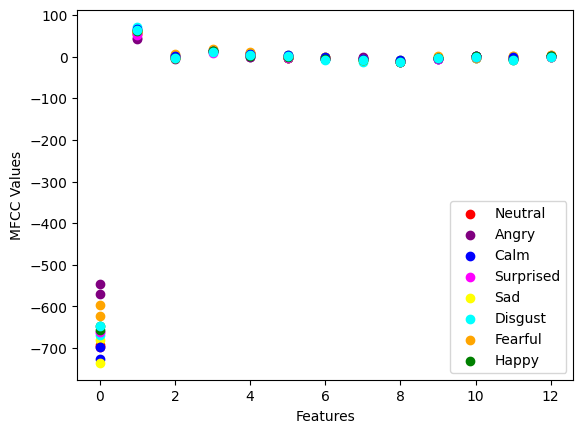

In [ ]:
visualize_by_statement(data_path)

In [ ]:
# sort emotions into bins
Neutral = []
Calm = []
Happy = []
Sad = []
Angry = []
Fearful = []
Disgust = []
Surprised = []
UNK = []

def emo_classification(X, y):
  for i in range(X.shape[0]):
    if y[i] == 'Neutral':
      Neutral.append(X[i])
    elif y[i] == 'Calm':
      Calm.append(X[i])
    elif y[i] == 'Happy':
      Happy.append(X[i])
    elif y[i] == 'Sad':
      Sad.append(X[i])
    elif y[i] == 'Angry':
      Angry.append(X[i])
    elif y[i] == 'Fearful':
      Fearful.append(X[i])
    elif y[i] == 'Disgust':
      Disgust.append(X[i])
    elif y[i] == 'Surprised':
      Surprised.append(X[i])
    elif y[i] == 'UNK':
      UNK.append(X[i])

emo_classification(X, y)

In [ ]:
# one-hot encode labels
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [ ]:
# save X, y
np.save('/content/drive/MyDrive/speech-emotion-recognition/X.npy', X)
np.save('/content/drive/MyDrive/speech-emotion-recognition/y.npy', y)

In [ ]:
# load X, y
X = np.load('/content/drive/MyDrive/speech-emotion-recognition/X.npy')
y = np.load('/content/drive/MyDrive/speech-emotion-recognition/y.npy')
print(X.shape, y.shape)

(1440, 13) (1440, 8)


In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
# CNN with torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from torchsummary import summary
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# transform preprocessed data to Dataset class
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

# transform arrays to torch tensors
X_train = Tensor(X_train).unsqueeze(1)
y_train = Tensor(y_train)
X_test = Tensor(X_test).unsqueeze(1)
y_test = Tensor(y_test)

train_set = TensorDataset(X_train, y_train) 
test_set = TensorDataset(X_test, y_test) 


In [ ]:
X_test.shape

torch.Size([288, 1, 13])

In [ ]:
# create DataLoaders
batch_size = 16

train_loader = DataLoader(train_set, batch_size = batch_size, 
                          shuffle = True, num_workers = 2)
test_loader = DataLoader(test_set, batch_size = batch_size, 
                          shuffle = True, num_workers = 2)

In [ ]:
# model1
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv1d(1, 32, kernel_size=3)
    self.bn1 = nn.BatchNorm1d(32)
    self.conv2 = nn.Conv1d(32, 64, kernel_size=3)
    self.bn2 = nn.BatchNorm1d(64)
    self.pool = nn.MaxPool1d(2)
    self.fc1 = nn.Linear(64, 128)
    self.fc2 = nn.Linear(128, 8)
  
  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = torch.flatten(x, 1) 
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model1 = ConvNet().to(device)

In [ ]:
# training loop
import torch.optim as optim

def train(model, k_epochs = 1, print_every = 20):

    loss_fn = nn.CrossEntropyLoss() 
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    correct, total = 0, 0

    for epoch in range(k_epochs): 

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):

            # extract a batch of training data from the data loader
            X, y = data
            X = X.to(device)
            y = y.to(device)

            # zero out gradients: we're going to recompute them in a moment
            optimizer.zero_grad()

            # compute the loss (forward pass)
            y_hat = model(X)
            loss = loss_fn(y_hat, y)

            # compute the gradient (backward pass)
            loss.backward()

            # Adam uses the gradient to update the parameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # for printing accuracy
            total += y.size(0)
            correct += (torch.argmax(y_hat, dim=1) == torch.argmax(y, dim=1)).sum().item()

            # print the epoch, number of batches processed, and running loss 
            # in regular intervals
            if i % print_every == print_every - 1:    
              print(f'[epoch: {epoch + 1}, batches: {i + 1:5d}], loss: {running_loss / print_every:.3f}, accuracy:{correct/total:.3f}')
              running_loss = 0.0

    print('Finished Training')



In [ ]:
# testing loop
def test(model, data_loader):
    correct = 0
    total = 0
    # torch.no_grad creates an environment in which we do NOT store the 
    # computational graph. We don't need to do this because we don't care about 
    # gradients unless we're training
    with torch.no_grad():
        for data in data_loader:
            X, y = data
            X = X.to(device)
            y = y.to(device)
            
            # run all the images through the model
            y_hat = model(X)

            # the class with the largest model output is the prediction
            predicted = torch.argmax(y_hat, dim=1)

            # compute the accuracy
            total += y.size(0)
            correct += (predicted == torch.argmax(y, dim=1)).sum().item()

    print(f'Test accuracy: {100 * correct // total} %')


In [ ]:
# train model1
train(model1, k_epochs = 50)

[epoch: 1, batches:    20], loss: 0.532, accuracy:0.811
[epoch: 2, batches:    20], loss: 0.530, accuracy:0.800
[epoch: 3, batches:    20], loss: 0.520, accuracy:0.805
[epoch: 4, batches:    20], loss: 0.491, accuracy:0.812
[epoch: 5, batches:    20], loss: 0.520, accuracy:0.814
[epoch: 6, batches:    20], loss: 0.455, accuracy:0.818
[epoch: 7, batches:    20], loss: 0.479, accuracy:0.818
[epoch: 8, batches:    20], loss: 0.490, accuracy:0.819
[epoch: 9, batches:    20], loss: 0.463, accuracy:0.820
[epoch: 10, batches:    20], loss: 0.438, accuracy:0.822
[epoch: 11, batches:    20], loss: 0.470, accuracy:0.825
[epoch: 12, batches:    20], loss: 0.482, accuracy:0.825
[epoch: 13, batches:    20], loss: 0.465, accuracy:0.825
[epoch: 14, batches:    20], loss: 0.462, accuracy:0.826
[epoch: 15, batches:    20], loss: 0.549, accuracy:0.825
[epoch: 16, batches:    20], loss: 0.434, accuracy:0.827
[epoch: 17, batches:    20], loss: 0.426, accuracy:0.829
[epoch: 18, batches:    20], loss: 0.459

In [ ]:
# test model1
test(model1, test_loader)

Test accuracy: 52 %


In [ ]:
# model2
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv1d(1, 32, kernel_size=3)
    self.bn1 = nn.BatchNorm1d(32)
    self.conv2 = nn.Conv1d(32, 64, kernel_size=3)
    self.bn2 = nn.BatchNorm1d(64)
    self.pool = nn.MaxPool1d(2)
    self.fc1 = nn.Linear(64, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, 8)
  
  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = torch.flatten(x, 1) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model2 = ConvNet().to(device)

In [ ]:
train(model2, k_epochs = 50)

[epoch: 1, batches:    20], loss: 2.061, accuracy:0.147
[epoch: 1, batches:    40], loss: 2.047, accuracy:0.156
[epoch: 1, batches:    60], loss: 2.023, accuracy:0.186
[epoch: 2, batches:    20], loss: 1.979, accuracy:0.198
[epoch: 2, batches:    40], loss: 1.896, accuracy:0.216
[epoch: 2, batches:    60], loss: 1.915, accuracy:0.214
[epoch: 3, batches:    20], loss: 1.810, accuracy:0.229
[epoch: 3, batches:    40], loss: 1.815, accuracy:0.235
[epoch: 3, batches:    60], loss: 1.822, accuracy:0.242
[epoch: 4, batches:    20], loss: 1.764, accuracy:0.250
[epoch: 4, batches:    40], loss: 1.731, accuracy:0.256
[epoch: 4, batches:    60], loss: 1.727, accuracy:0.261
[epoch: 5, batches:    20], loss: 1.722, accuracy:0.266
[epoch: 5, batches:    40], loss: 1.690, accuracy:0.272
[epoch: 5, batches:    60], loss: 1.740, accuracy:0.275
[epoch: 6, batches:    20], loss: 1.746, accuracy:0.278
[epoch: 6, batches:    40], loss: 1.728, accuracy:0.281
[epoch: 6, batches:    60], loss: 1.660, accurac

In [ ]:
test(model2, test_loader)

Test accuracy: 41 %


In [ ]:
# model3
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv1d(1, 32, kernel_size=3)
    self.bn1 = nn.BatchNorm1d(32)
    self.conv2 = nn.Conv1d(32, 64, kernel_size=3)
    self.bn2 = nn.BatchNorm1d(64)
    self.conv3 = nn.Conv1d(64, 128, kernel_size=3)
    self.bn3 = nn.BatchNorm1d(128)
    self.pool = nn.MaxPool1d(2)
    self.fc1 = nn.Linear(128, 64)
    self.fc2 = nn.Linear(64, 8)
  
  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = self.pool(F.relu(self.bn3(self.conv3(x))))
    x = torch.flatten(x, 1) 
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model3 = ConvNet().to(device)

In [ ]:
train(model3, k_epochs = 50)

RuntimeError: ignored